In [1]:
# import sys
# import os
# # sys.path is a list of absolute path strings
# sys.path.append('/home/sanghyuk.kim001/MELANOMA/melanoma-detection-CNN/')

import melanoma as mel

2023-10-23 23:35:30.944883: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload -p 2

# from IPython.core.debugger import Pdb

In [3]:
# dir = os.path.realpath('.') + '/melanoma-detection-CNN'

dbpath = './HAM10000_images_combined'
img_width = 150
img_height = 112
utilInstance = mel.Util(dbpath, (img_height, img_width))
dbtype = mel.DatasetType.HAM10000
data_gen, trainimages, testimages, validationimages, trainlabels, testlabels, validationlabels, num_classes = utilInstance.loadMelanomaDataset(dbtype)

path:  HAM10000_images_combined
seed value:  1
color_mode:  rgb
Images available in train dataset: 10015
df.head() --------------
     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

        dataset  
0  vidir_modern  
1  vidir_modern  
2  vidir_modern  
3  vidir_modern  
4  vidir_modern  
df.sample(5) --------------
        lesion_id      image_id   dx    dx_type   age     sex  \
340   HAM_0003140  ISIC_0027037  bkl      histo  70.0  female   
5000  HAM_0004631  ISIC_0032473   nv  follow_up  55.0  female   
1164  HAM_0003487  ISIC_0024845   df  consensus  40.0    male   
1218  HAM_0007310  ISIC_0026120  mel      histo  55.0

In [4]:
base_model = mel.CNN(None, None, None, num_classes)
ResNet50_name = 'my resnet50'
Resnet50_model = base_model.resnet50(ResNet50_name)

2023-10-23 23:36:55.630848: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-10-23 23:36:55.838319: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-23 23:36:55.838357: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-10-23 23:36:55.856658: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-10-23 23:36:55.856693: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-10-23 23:36:55.858627: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

Building my resnet50 model...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 903       
Total params: 23,850,887
Trainable params: 263,175
Non-trainable params: 23,587,712
_________________________________________________________________
None


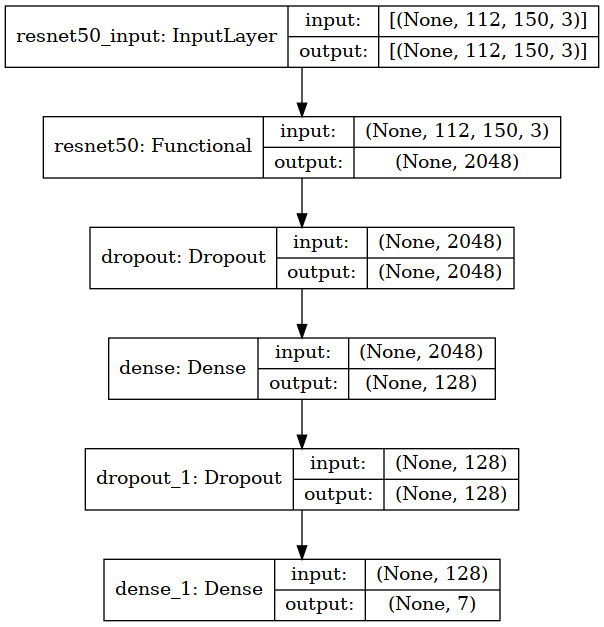

In [5]:
# Install the below beforehand
# pip install pydot
# conda install -c anaconda graphviz
visualizer = mel.Visualizer()
visualizer.visualize_model(model = Resnet50_model, model_name = ResNet50_name)

In [6]:
history = base_model.fit_model(    
    model = Resnet50_model,
    model_name = ResNet50_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
    data_gen = data_gen
)


Fitting my resnet50 model...


2023-10-23 23:36:59.478714: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-10-23 23:36:59.480075: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245720000 Hz


Epoch 1/30


2023-10-23 23:37:01.490499: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-10-23 23:37:02.088856: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-10-23 23:37:02.725255: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-10-23 23:37:02.725279: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-10-23 23:37:02.725332: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-10-23 23:37:03.481244: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-10-23 23:37:04.172017: I tensorflow/stream_exec

  3/401 [..............................] - ETA: 27s - loss: 8.4475 - accuracy: 0.2167   

2023-10-23 23:37:21.824517: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


401/401 [==============================] - 90s 170ms/step - loss: 5.8205 - accuracy: 0.5562 - val_loss: 4.3571 - val_accuracy: 0.8075


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
401/401 [==============================] - 30s 75ms/step - loss: 4.1542 - accuracy: 0.6283 - val_loss: 3.3420 - val_accuracy: 0.8188
Epoch 3/30
401/401 [==============================] - 30s 75ms/step - loss: 3.2764 - accuracy: 0.6395 - val_loss: 2.5857 - val_accuracy: 0.8188
Epoch 4/30
401/401 [==============================] - 30s 75ms/step - loss: 2.6560 - accuracy: 0.6579 - val_loss: 2.0850 - val_accuracy: 0.8347
Epoch 5/30
401/401 [==============================] - 30s 75ms/step - loss: 2.2512 - accuracy: 0.6639 - val_loss: 1.7557 - val_accuracy: 0.8414
Epoch 6/30
401/401 [==============================] - 30s 75ms/step - loss: 1.9522 - accuracy: 0.6747 - val_loss: 1.5141 - val_accuracy: 0.8471
Epoch 7/30
401/401 [==============================] - 30s 75ms/step - loss: 1.7330 - accuracy: 0.6821 - val_loss: 1.3301 - val_accuracy: 0.8313
Epoch 8/30
401/401 [==============================] - 30s 75ms/step - loss: 1.5534 - accuracy: 0.6875 - val_loss: 1.1744 - val_accuracy:

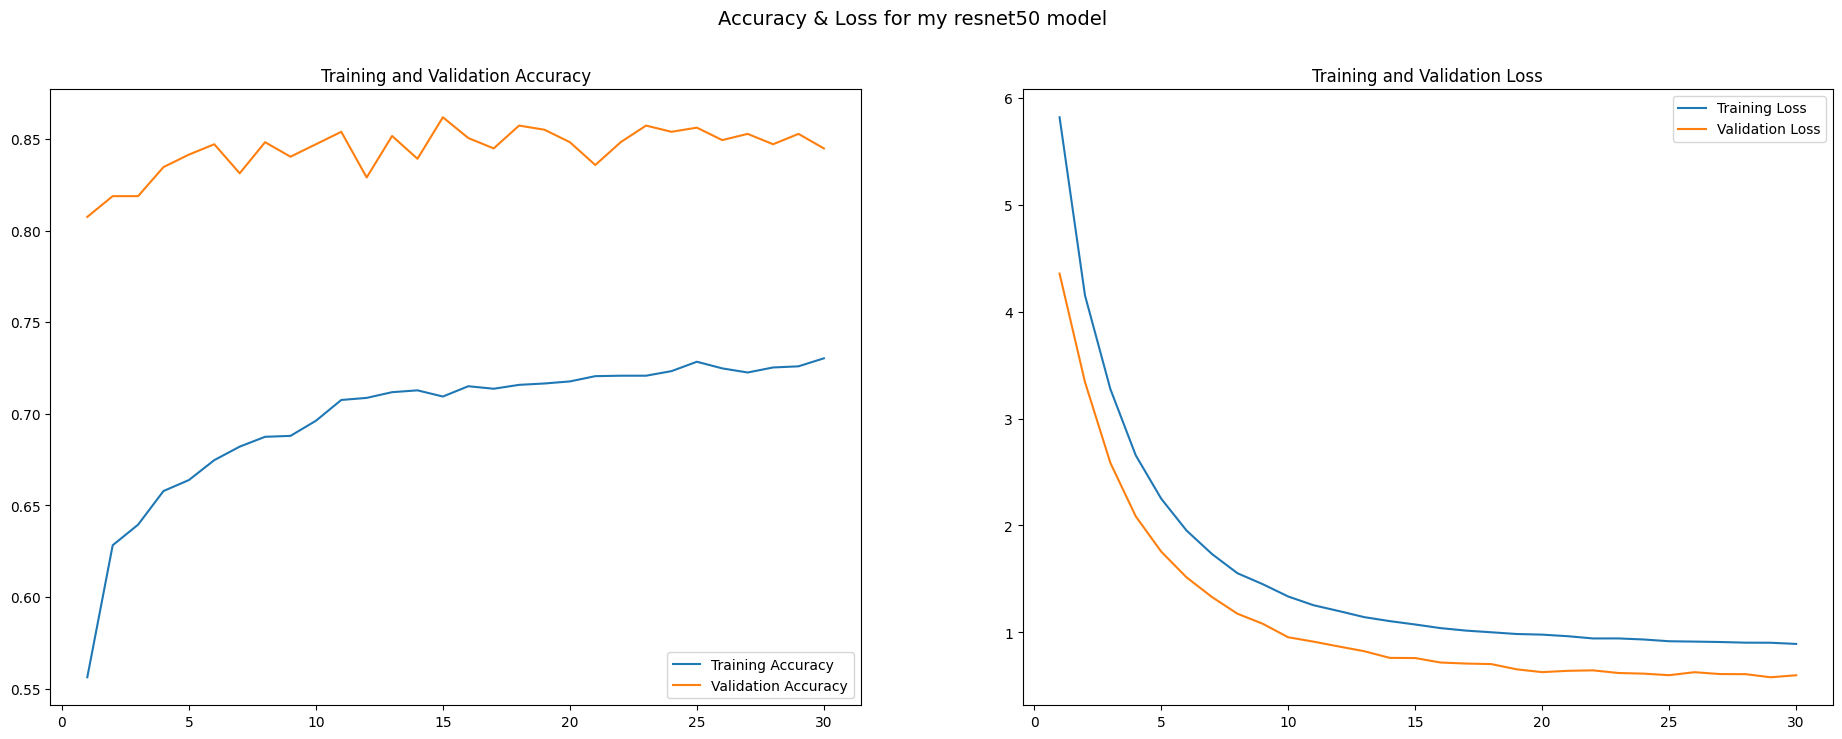

In [7]:
visualizer.visualize_performance(
    model_name = ResNet50_name,
    history = history
)


In [8]:
Resnet50_model, test_loss, ResNet50_test_acc = base_model.evaluate_model(
    model_name = ResNet50_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
    testimages = testimages,
    testlabels = testlabels
)


Evaluating my resnet50 model...

249/251 [============================>.] - ETA: 0s - loss: 0.8279 - accuracy: 0.7504

251/251 [==============================] - 42s 91ms/step - loss: 0.8380 - accuracy: 0.7457
Train loss = 0.8380038142204285  ;  Train accuracy = 74.57%

28/28 [==============================] - 19s 693ms/step - loss: 0.5860 - accuracy: 0.8471
Validation loss = 0.585974395275116  ;  Validation accuracy = 84.71%

35/35 [==============================] - 19s 564ms/step - loss: 0.5780 - accuracy: 0.8722
Test loss = 0.5779644250869751  ;  Test accuracy = 87.22%


In [9]:
train_pred, train_pred_classes, test_pred, test_pred_classes = base_model.computing_prediction(
    model = Resnet50_model,
    model_name = ResNet50_name,
    trainimages = trainimages,
    testimages = testimages
)

test_pred, test_pred_classes

Computing predictions for my resnet50...


(array([[1.3164313e-04, 3.2714970e-04, 5.2219821e-04, ..., 2.3083983e-03,
         9.9516451e-01, 1.1431236e-03],
        [8.3538452e-03, 2.9003877e-02, 1.5560053e-02, ..., 1.2331938e-02,
         8.9003986e-01, 3.0604232e-02],
        [3.9672703e-04, 3.0810022e-04, 2.9956168e-03, ..., 4.8052459e-03,
         9.9091715e-01, 9.4614756e-05],
        ...,
        [3.1147255e-03, 4.0070736e-03, 9.3788030e-03, ..., 2.4014881e-02,
         9.5556152e-01, 8.7016681e-04],
        [4.6638516e-03, 9.0518100e-03, 7.4678650e-03, ..., 7.3959474e-03,
         9.5631438e-01, 4.0537235e-03],
        [7.1324475e-02, 4.1347393e-01, 2.7459186e-01, ..., 2.4497157e-02,
         1.6553278e-01, 1.5494260e-02]], dtype=float32),
 array([5, 5, 5, ..., 5, 5, 1]))

Model report for my resnet50 model ->


Train Report :
                             precision    recall  f1-score   support

Pigmented Benign keratosis       0.79      0.10      0.18       264
          Melanocytic nevi       0.47      0.68      0.55       452
            Dermatofibroma       0.60      0.43      0.50       945
                  Melanoma       0.00      0.00      0.00       101
          Vascular lesions       0.68      0.23      0.34      1029
      Basal cell carcinoma       0.79      0.97      0.87      5110
         Actinic keratoses       0.90      0.50      0.64       128

                  accuracy                           0.75      8029
                 macro avg       0.60      0.41      0.44      8029
              weighted avg       0.73      0.75      0.70      8029

Test Report :
                             precision    recall  f1-score   support

Pigmented Benign keratosis       1.00      0.03      0.06        32
          Melanocytic nevi       0.44    

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

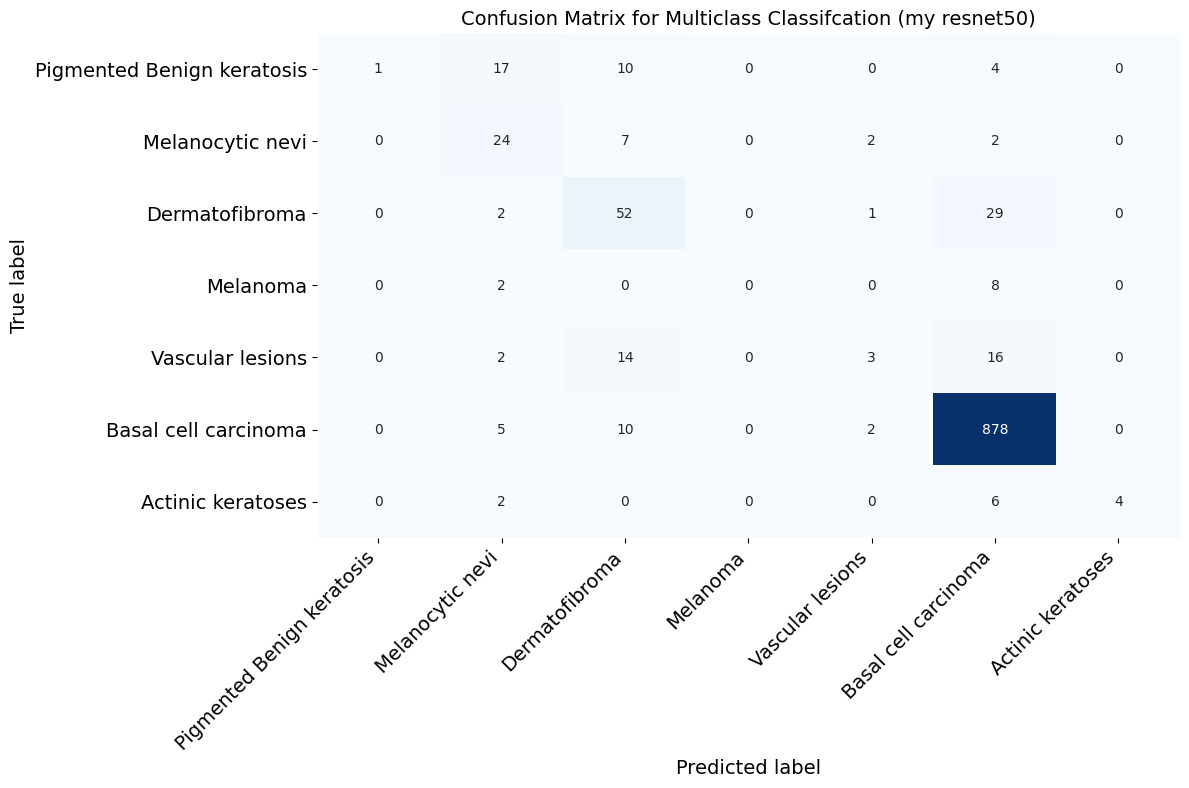

In [11]:
visualizer.model_report(
    model_name = ResNet50_name,
    trainlabels = trainlabels,
    train_pred_classes = train_pred_classes,
    testlabels = testlabels,
    test_pred_classes = test_pred_classes,
    lesion_type_dict = utilInstance.lesion_type_dict
)
